In [17]:
import kagglehub
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [18]:
complaints_path = kagglehub.dataset_download('xiaomengsun/car-insurance-claim-data')
print(complaints_path)

C:\Users\adhit\.cache\kagglehub\datasets\xiaomengsun\car-insurance-claim-data\versions\1


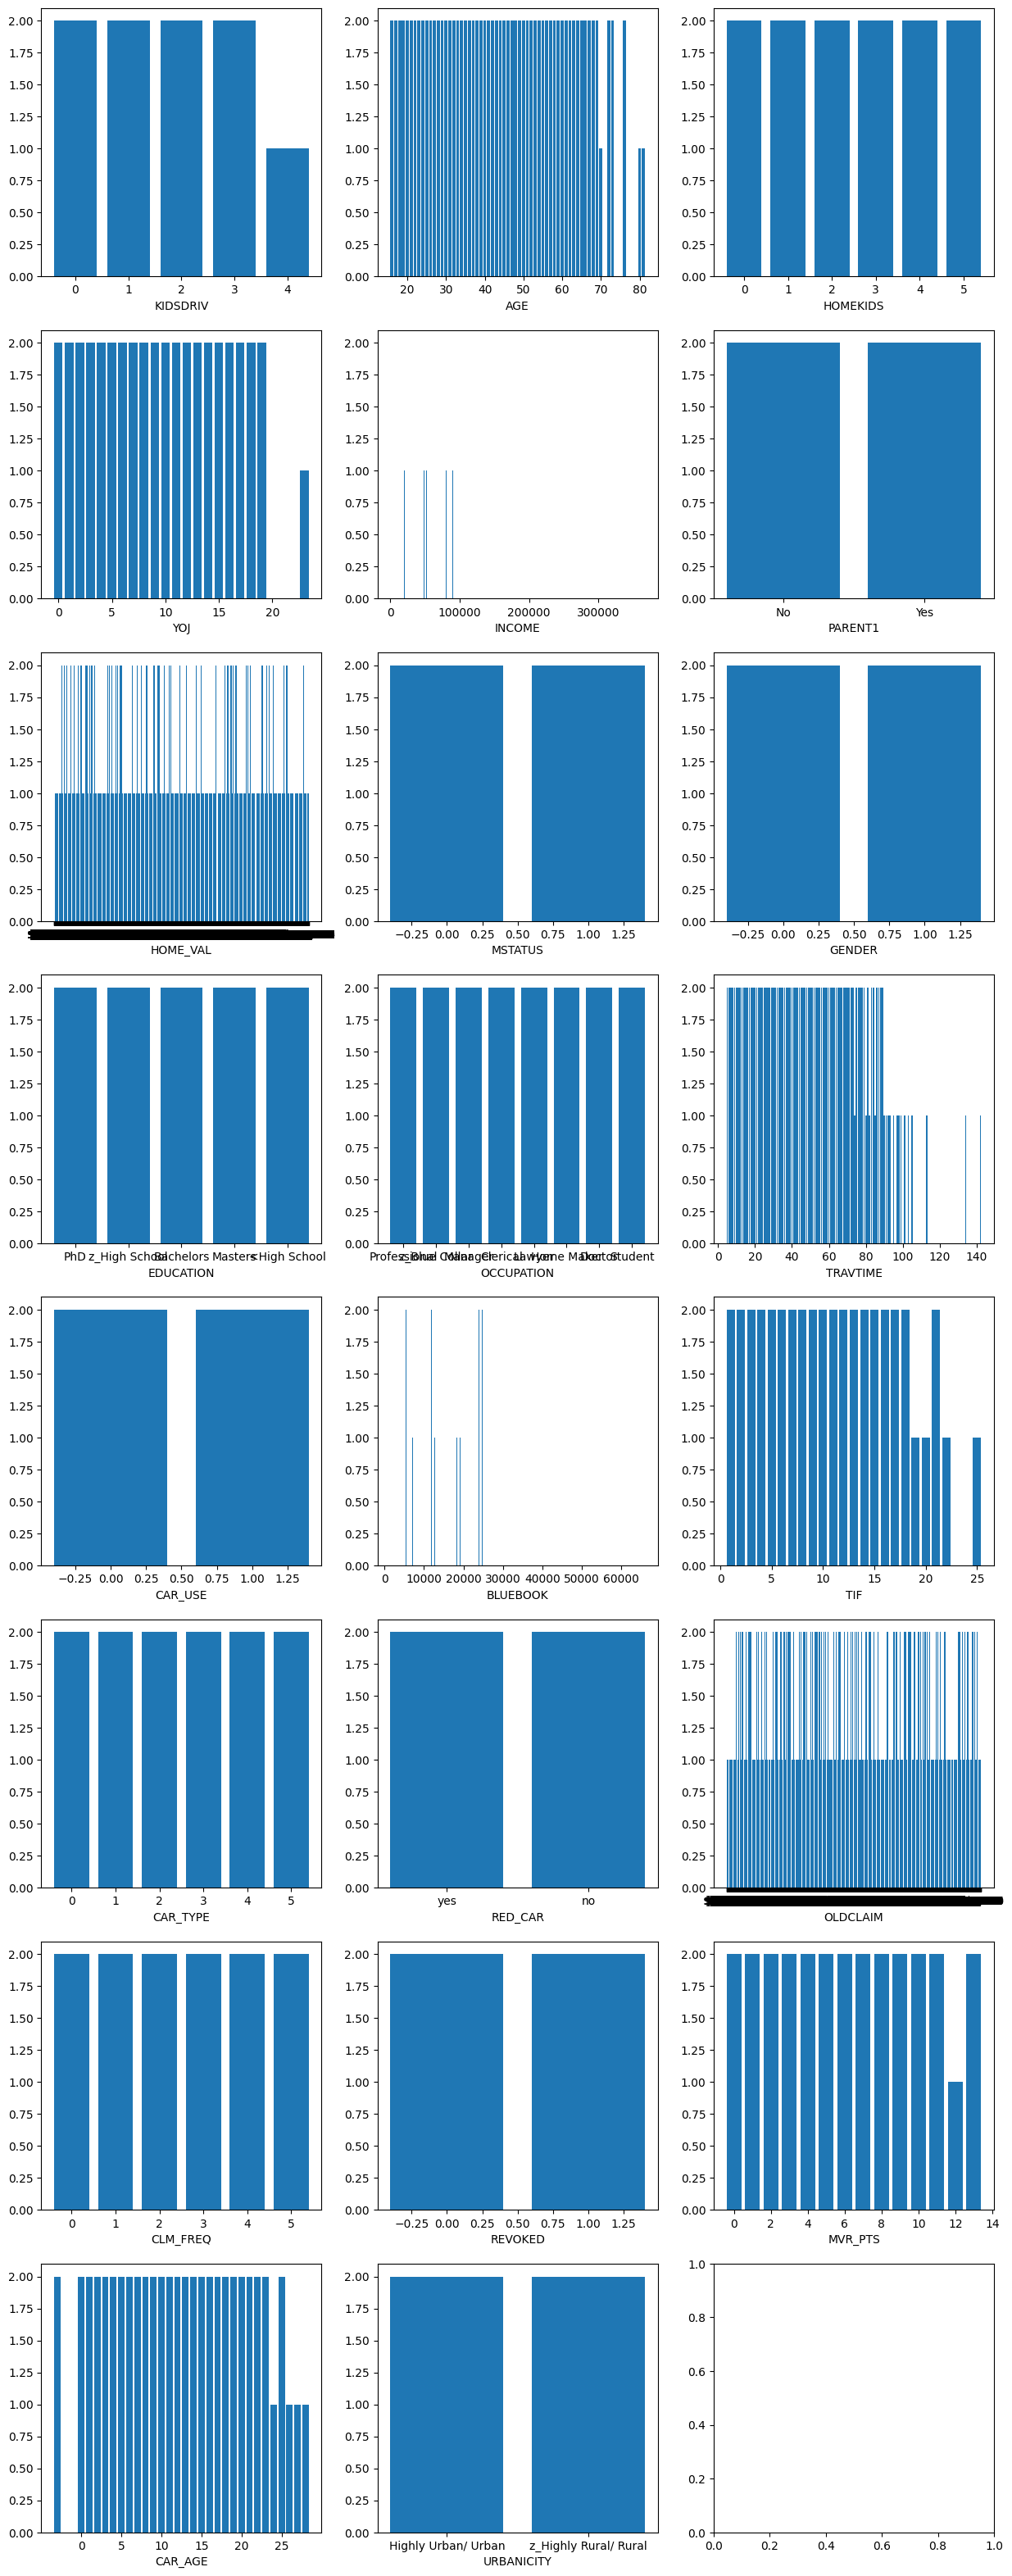

In [25]:
def cat_to_numeric_map(column: pd.Series):
    m = {}
    for i, cat in enumerate(column.unique()):
        m[cat] = i
    return m

def money_to_numeric(column: pd.Series):
    return column.str.replace(r'\D', '', regex=True)

df = pd.read_csv('data/initial_claims.csv').dropna()

for mon_col_name in [ 'INCOME', 'BLUEBOOK' ]:
    df[mon_col_name] = pd.to_numeric(money_to_numeric(df[mon_col_name]))
for str_col_name in [ 'MSTATUS', 'GENDER', 'CAR_USE', 'CAR_TYPE', 'REVOKED' ]:
    df[str_col_name] = df[str_col_name].map(cat_to_numeric_map(df[str_col_name]))
# print(df.head())

selected_cols = [
    'KIDSDRIV',
    'AGE',
    'HOMEKIDS',
    'YOJ',
    'INCOME',
    'PARENT1',
    'HOME_VAL',
    'MSTATUS',
    'GENDER',
    'EDUCATION',
    'OCCUPATION',
    'TRAVTIME',
    'CAR_USE',
    'BLUEBOOK',
    'TIF',
    'CAR_TYPE',
    'RED_CAR',
    'OLDCLAIM',
    'CLM_FREQ',
    'REVOKED',
    'MVR_PTS',
    'CAR_AGE',
    'URBANICITY', 
]

n_cols = 3
n_rows = len(selected_cols) // n_cols + 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
r = 0
c = 0
for col_name in selected_cols:
    ax[r, c].bar(df[col_name], df['CLAIM_FLAG'] + 1)
    ax[r, c].set_xlabel(col_name)
    c += 1
    if c == 3:
        c = 0
        r += 1
plt.show()

    